In [7]:
import numpy
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(10)

(x_img_train, y_label_train), \
(x_img_test, y_label_test) = tf.keras.datasets.cifar10.load_data()
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
x_img_train.shape

(50000, 32, 32, 3)

In [1]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if (num > 25):
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(x_train[i], cmap='binary')
        
        title = str(i) + ',' + label_dict[list(labels[i]).index(1)]
        
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx += 1 
    plt.show()

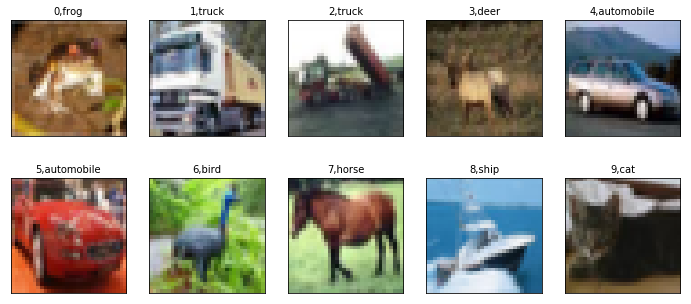

In [9]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [25]:
y_label_train_OneHot = tf.keras.utils.to_categorical(y_label_train)
y_label_test_OneHot = tf.keras.utils.to_categorical(y_label_test)
X_img_train_normalize = x_img_train.astype('float32') / 255.0
X_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
y_label_train_OneHot.shape

(50000, 10)

In [13]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32,3),
                 activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=300, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 114us/sample - loss: 0.3177 - accuracy: 0.8870 - val_loss: 0.6772 - val_accuracy: 0.7931
Epoch 2/10
40000/40000 [==============================] - 5s 114us/sample - loss: 0.2900 - accuracy: 0.8978 - val_loss: 0.6816 - val_accuracy: 0.7982
Epoch 3/10
40000/40000 [==============================] - 5s 115us/sample - loss: 0.2630 - accuracy: 0.9071 - val_loss: 0.6946 - val_accuracy: 0.7923
Epoch 4/10
40000/40000 [==============================] - 5s 116us/sample - loss: 0.2546 - accuracy: 0.9109 - val_loss: 0.6871 - val_accuracy: 0.7894
Epoch 5/10
40000/40000 [==============================] - 5s 115us/sample - loss: 0.2408 - accuracy: 0.9168 - val_loss: 0.7200 - val_accuracy: 0.7889
Epoch 6/10
40000/40000 [==============================] - 5s 114us/sample - loss: 0.2217 - accuracy: 0.9222 - val_loss: 0.7438 - val_accuracy: 0.7840
Epoch 7/10
40000/40000 [==========================

In [40]:
scores = model.evaluate(X_img_test_normalize, y_label_test_OneHot,verbose=0)
scores[1]

0.7806

In [50]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if (num > 25):
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
                
        title = str(i) + ',' + label_dict[list(labels[i]).index(1)]
        if(len(prediction) > 0):
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    plt.show()

In [52]:
prediction = model.predict_classes(X_img_test_normalize)

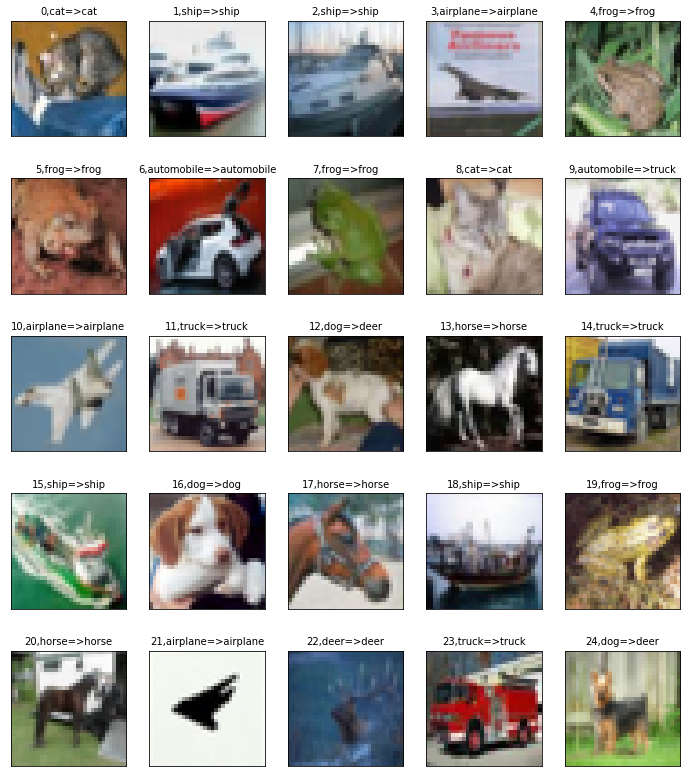

In [54]:
plot_images_labels_prediction(X_img_test_normalize, y_label_test, prediction, 0, 30)